### load libraries

In [42]:
library(arules)
library(arulesViz)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks arules::recode()
✖ tidyr::unpack() masks Matrix::unpack()


### load data

In [73]:
df_tran <- read.transactions('arm_data.txt', format="basket", skip=1, sep=',')

# we have a lot of data, this will take a while to load

In [74]:
inspect(head(df_tran))

    items                 
[1] {pop, rock}           
[2] {rock, trance}        
[3] {ambient, metal, rock}
[4] {rock}                
[5] {blues, metal, rock}  
[6] {pop, rock}           


In [75]:
df_tran

transactions in sparse format with
 879245 transactions (rows) and
 72 items (columns)

### use the apriori algorithm

We'll start with a support threshold (minsup) of 0.33, meaning that we are looking for item sets that are included in at least a third of our data. Let's also start with a confidence value of 0.5, and see how many rules are found that meet this threshold.

In [76]:
rule1 <- apriori(df_tran, parameter=list(support=0.33, confidence=0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.33      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 290150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[72 item(s), 879245 transaction(s)] done [0.24s].
sorting and recoding items ... [2 item(s)] done [0.02s].
creating transaction tree ... done [0.18s].
checking subsets of size 1 2 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.04s].


In [77]:
inspect(head(rule1, 5))

    lhs       rhs    support   confidence coverage  lift     count 
[1] {}     => {pop}  0.6054058 0.6054058  1.0000000 1.000000 532300
[2] {}     => {rock} 0.7648562 0.7648562  1.0000000 1.000000 672496
[3] {pop}  => {rock} 0.4823968 0.7968157  0.6054058 1.041785 424145
[4] {rock} => {pop}  0.4823968 0.6307026  0.7648562 1.041785 424145


It seems like this only resulted in 4 rules, which is low compared to the number we are looking for (15+) and only includes the broadest and thus most frequently used terms, pop and rock. Let's try reducing the support, because we have 73 different types of items. If each item was equally likely in the data, that would be a support of 1/73 = ~0.01. 

Let's quickly visualize the frequencies of items in our data

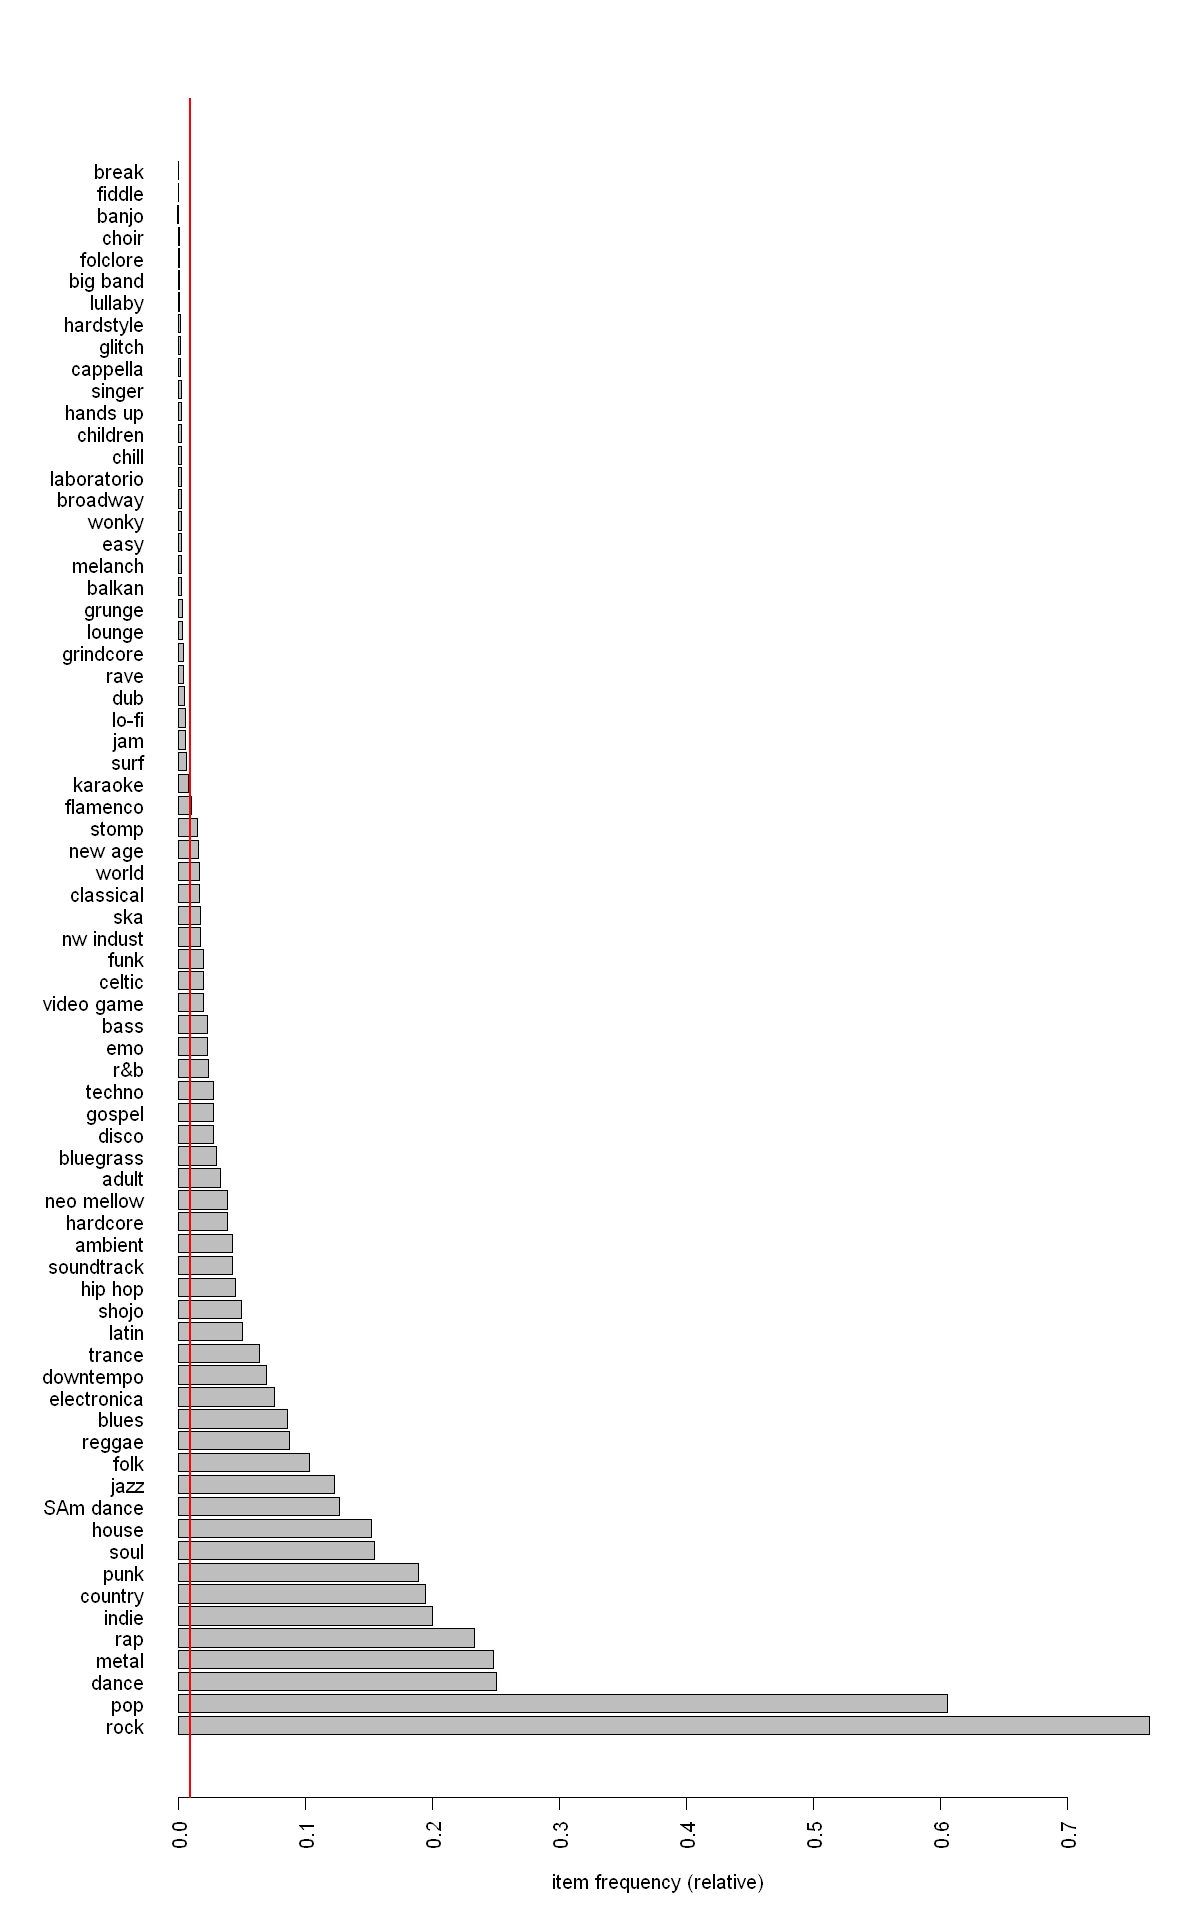

In [96]:
options(repr.plot.width=10, repr.plot.height=16)
itemFrequencyPlot(df_tran, topN=72, type="relative", horiz=TRUE)
abline(v=0.01, col="red", lwd=2)

In [97]:
png("FIGURES/itemfreq.png", width=10, height=16, units="in", res=300)
itemFrequencyPlot(df_tran, topN=72, type="relative", horiz=TRUE)
abline(v=0.01, col="red", lwd=2)
dev.off()

png 
  2

In [98]:
rule1 <- apriori(df_tran, parameter=list(support=0.01, confidence=0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 8792 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[72 item(s), 879245 transaction(s)] done [0.22s].
sorting and recoding items ... [43 item(s)] done [0.04s].
creating transaction tree ... done [0.60s].
checking subsets of size 1 2 3 4 5 6 done [0.31s].
writing ... [2232 rule(s)] done [0.00s].
creating S4 object  ... done [0.06s].


In [88]:
inspect(head(sort(rule1, by="support"), 15))

     lhs              rhs    support   confidence coverage  lift     count 
[1]  {}            => {rock} 0.7648562 0.7648562  1.0000000 1.000000 672496
[2]  {}            => {pop}  0.6054058 0.6054058  1.0000000 1.000000 532300
[3]  {pop}         => {rock} 0.4823968 0.7968157  0.6054058 1.041785 424145
[4]  {rock}        => {pop}  0.4823968 0.6307026  0.7648562 1.041785 424145
[5]  {dance}       => {rock} 0.2104499 0.8398023  0.2505945 1.097987 185037
[6]  {metal}       => {rock} 0.2097265 0.8441453  0.2484484 1.103665 184401
[7]  {rap}         => {rock} 0.1865510 0.8005076  0.2330408 1.046612 164024
[8]  {dance}       => {pop}  0.1811804 0.7230024  0.2505945 1.194244 159302
[9]  {indie}       => {rock} 0.1792288 0.8940238  0.2004743 1.168878 157586
[10] {punk}        => {rock} 0.1644217 0.8701045  0.1889678 1.137605 144567
[11] {metal}       => {pop}  0.1628226 0.6553581  0.2484484 1.082510 143161
[12] {dance, pop}  => {rock} 0.1595892 0.8808301  0.1811804 1.151628 140318
[13] {dance,

In [89]:
inspect(head(sort(rule1, by="confidence"), 15))

     lhs                                  rhs    support    confidence
[1]  {dance, house, indie, pop, punk}  => {rock} 0.01089799 0.9946024 
[2]  {indie, metal, pop, punk, rap}    => {rock} 0.01179535 0.9945339 
[3]  {house, indie, metal, punk}       => {rock} 0.01063185 0.9937281 
[4]  {dance, indie, metal, pop, punk}  => {rock} 0.01330915 0.9934629 
[5]  {dance, house, metal, pop, punk}  => {rock} 0.01156219 0.9930644 
[6]  {dance, indie, pop, punk, rap}    => {rock} 0.01215133 0.9930291 
[7]  {house, indie, metal, rap}        => {rock} 0.01035775 0.9920479 
[8]  {indie, pop, punk, reggae}        => {rock} 0.01046352 0.9920207 
[9]  {dance, house, indie, metal, pop} => {rock} 0.01188747 0.9919332 
[10] {dance, indie, jazz, metal}       => {rock} 0.01061365 0.9919218 
[11] {house, metal, pop, punk, rap}    => {rock} 0.01101058 0.9917025 
[12] {dance, indie, metal, pop, soul}  => {rock} 0.01067393 0.9915478 
[13] {dance, house, pop, punk, rap}    => {rock} 0.01063412 0.9915164 
[14] {

In [90]:
inspect(head(sort(rule1, by="lift", decreasing=FALSE), 15))

     lhs                            rhs    support    confidence coverage  
[1]  {}                          => {pop}  0.60540577 0.6054058  1.00000000
[2]  {}                          => {rock} 0.76485621 0.7648562  1.00000000
[3]  {country}                   => {rock} 0.15001734 0.7698351  0.19486946
[4]  {shojo}                     => {rock} 0.03980461 0.7961147  0.04999858
[5]  {pop}                       => {rock} 0.48239683 0.7968157  0.60540577
[6]  {rock}                      => {pop}  0.48239683 0.6307026  0.76485621
[7]  {rap}                       => {rock} 0.18655096 0.8005076  0.23304085
[8]  {r&b}                       => {rock} 0.01963275 0.8129798  0.02414913
[9]  {country, shojo}            => {rock} 0.02000353 0.8160728  0.02451194
[10] {metal}                     => {pop}  0.16282265 0.6553581  0.24844838
[11] {country, pop}              => {rock} 0.11139102 0.8318470  0.13390807
[12] {country, SAm dance}        => {rock} 0.03559531 0.8321900  0.04277306
[13] {SAm da

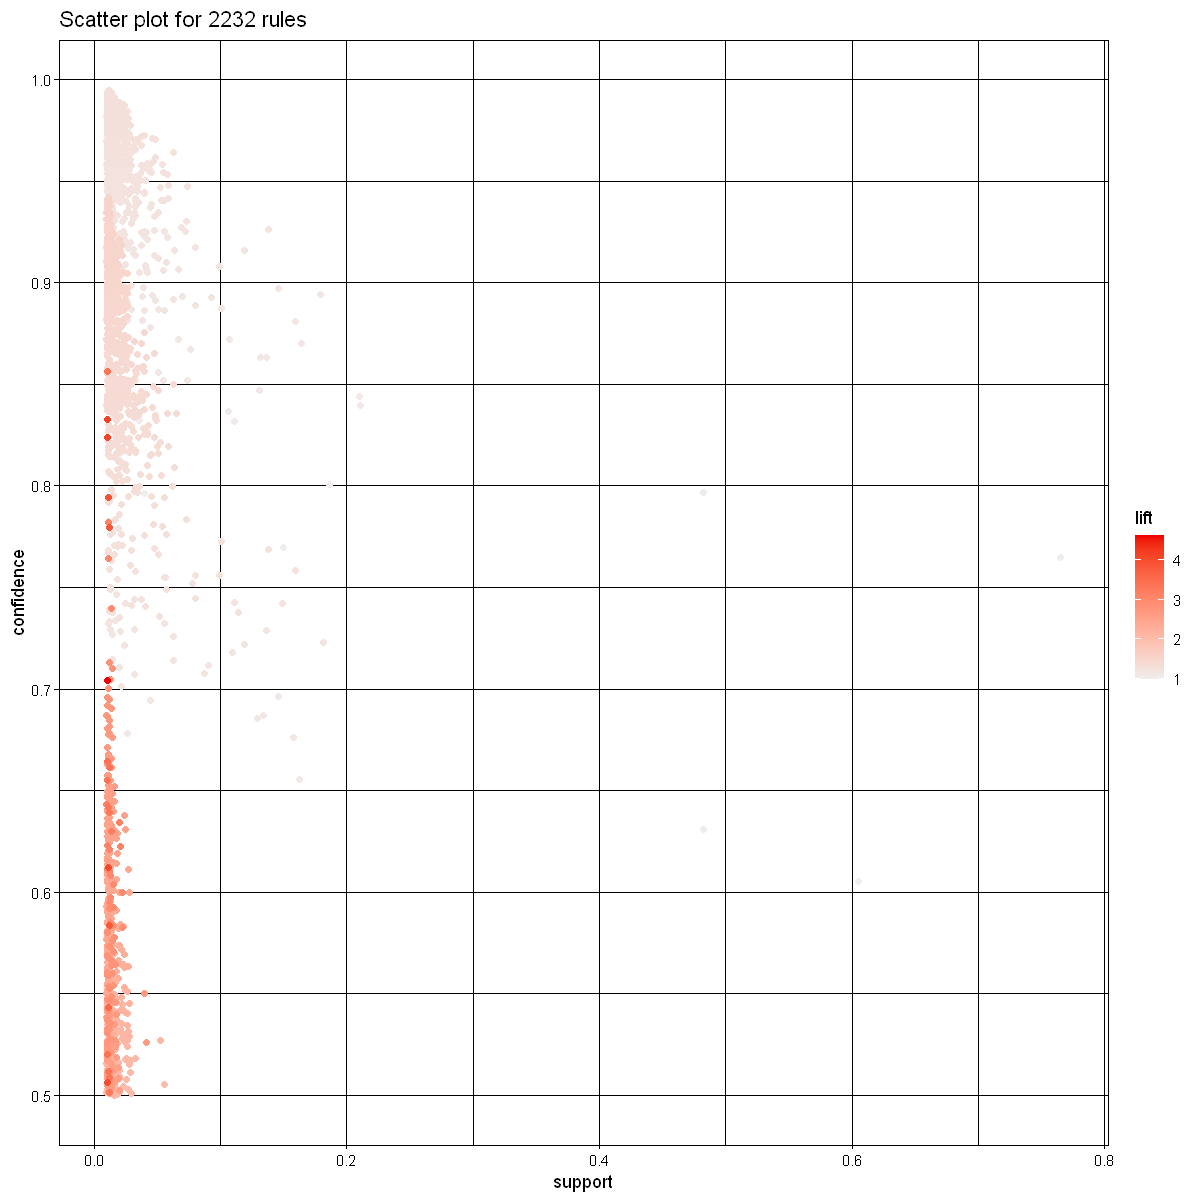

In [94]:
plot(rule1)

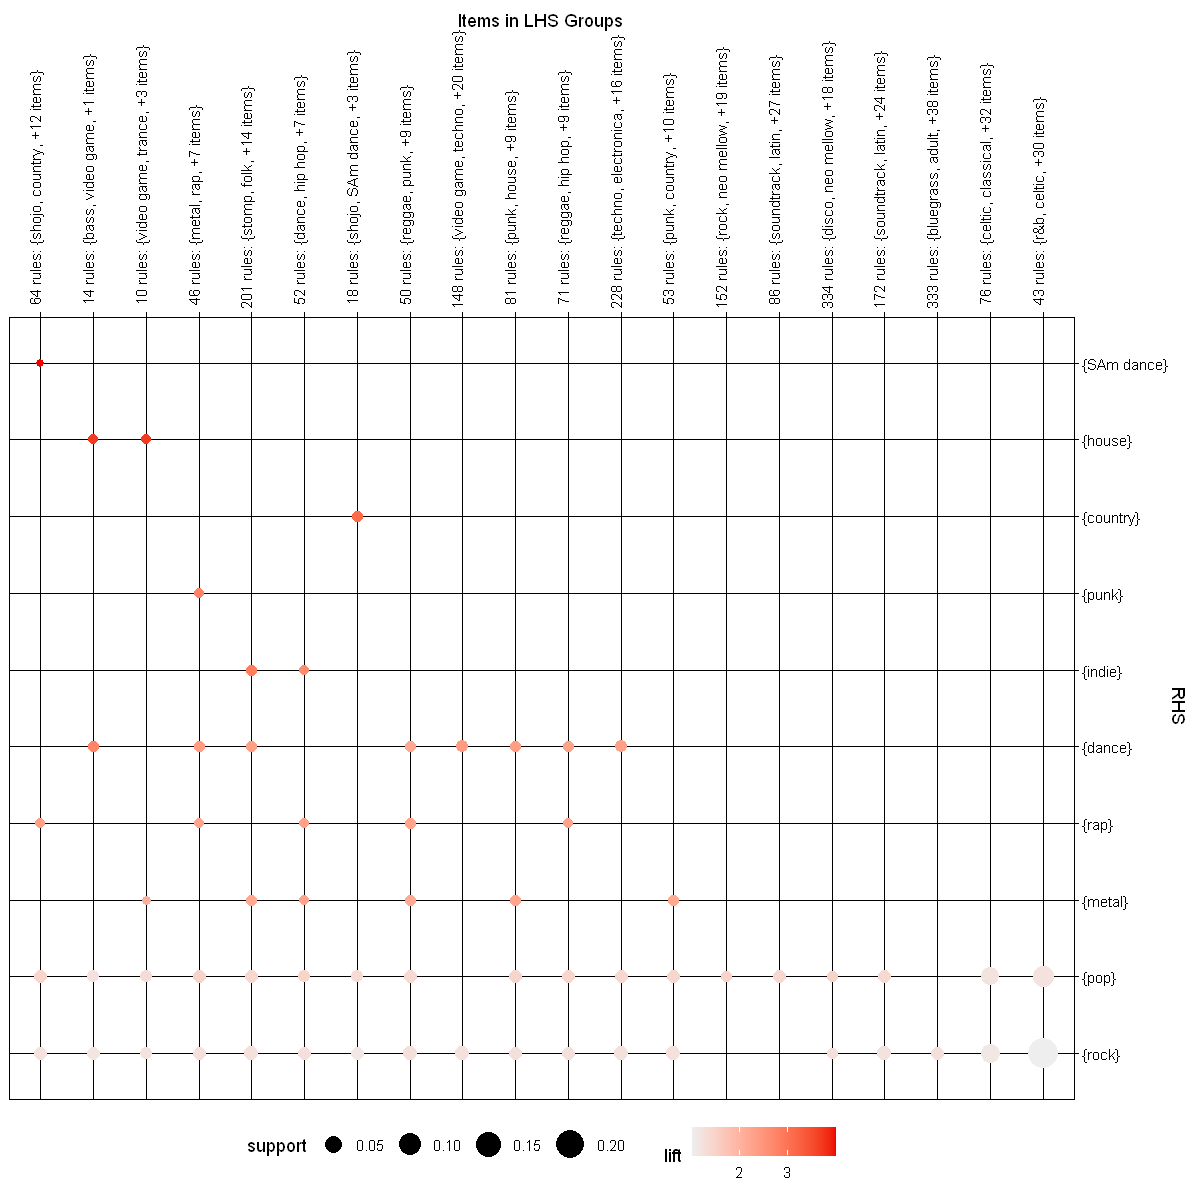

In [93]:
plot(rule1, method="grouped")

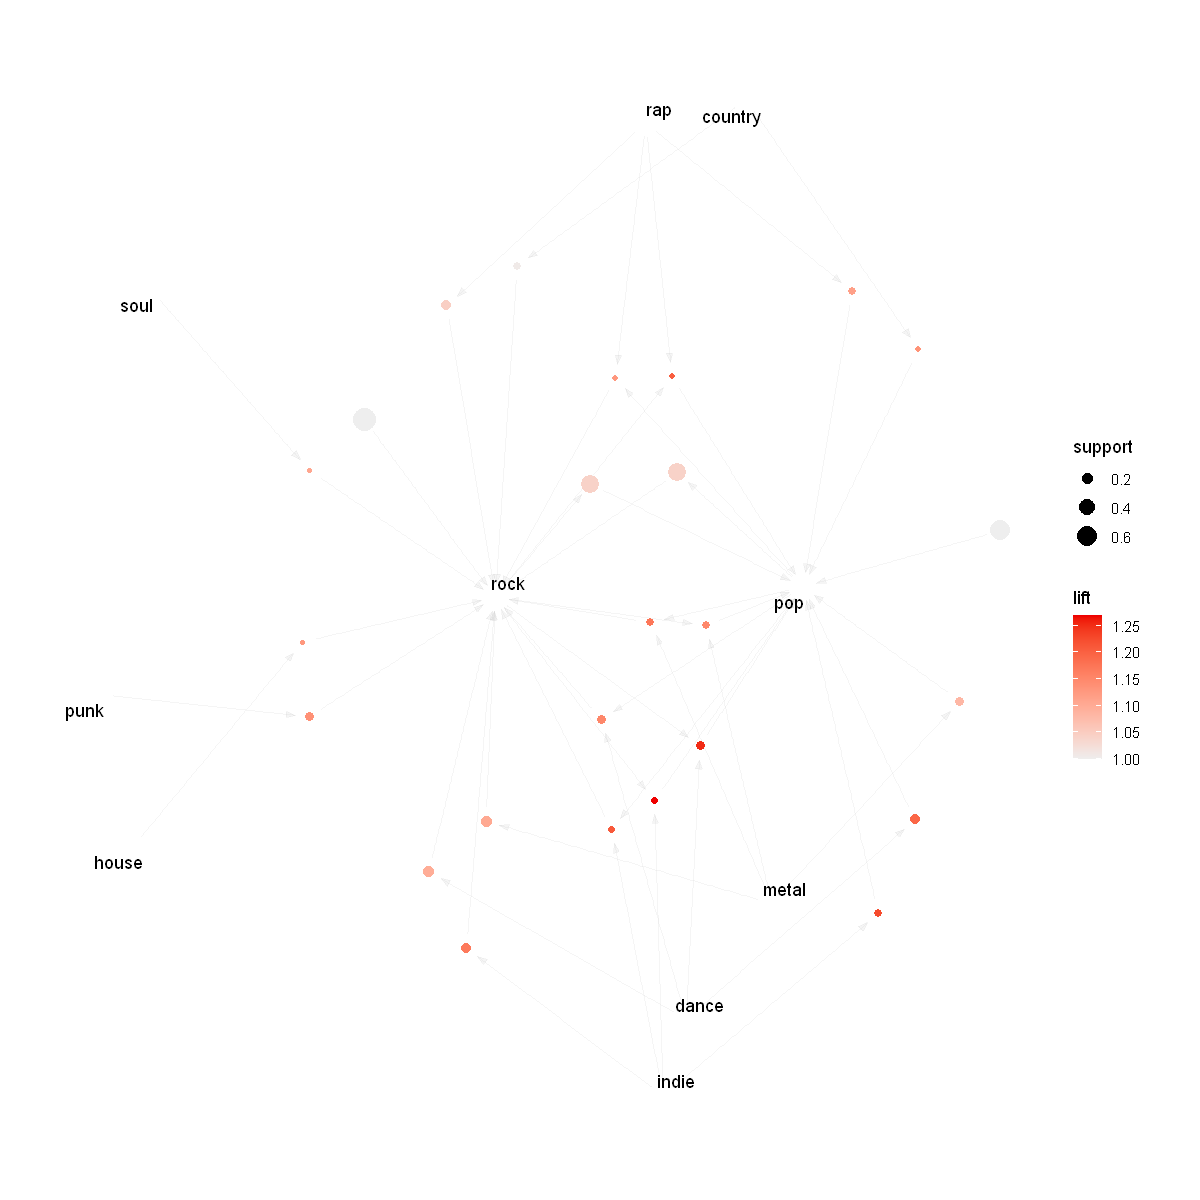

In [92]:
options(repr.plot.width=10, repr.plot.height=10)
subrulesK <- head(sort(rule1, by="support"),25)
plot(subrulesK, method="graph")

In [37]:
?itemFrequencyPlot